In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

#### Загрузка и подготовка данных

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

num_classes = 10
train_labels_cat = to_categorical(train_labels, num_classes)
test_labels_cat = to_categorical(test_labels, num_classes)

In [ ]:
print(f"Размер train_images: {train_images.shape}")
print(f"Размер train_labels_cat: {train_labels_cat.shape}")
print(f"Размер test_images: {test_images.shape}")
print(f"Размер test_labels_cat: {test_labels_cat.shape}")

Размер train_images: (50000, 32, 32, 3)
Размер train_labels_cat: (50000, 10)
Размер test_images: (50000, 32, 32, 3)
Размер test_labels_cat: (10000, 10)


In [ ]:
class_names = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень',
               'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

#### Базовая модель

In [ ]:
def create_baseline_model():
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))

  return model

In [ ]:
model = create_baseline_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Обучение и оценка модели

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=15,
                    validation_data=(test_images, test_labels_cat),
                    batch_size=64, verbose=1)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 89ms/step - accuracy: 0.4740 - loss: 1.4699 - val_accuracy: 0.5704 - val_loss: 1.2095
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.5402 - loss: 1.3057 - val_accuracy: 0.6133 - val_loss: 1.0887
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.5852 - loss: 1.1879 - val_accuracy: 0.6379 - val_loss: 1.0374
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.6147 - loss: 1.1059 - val_accuracy: 0.6552 - val_loss: 0.9950
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.6372 - loss: 1.0471 - val_accuracy: 0.6689 - val_loss: 0.9590
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.6480 - loss: 1.0041 - val_accuracy: 0.6660 - val_loss: 0.9513
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.6627 - loss: 0.9704 - val_accuracy: 0.6757 - val_loss: 0.9346
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 88ms/step - accuracy: 0.6769 - loss: 0.9283 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step


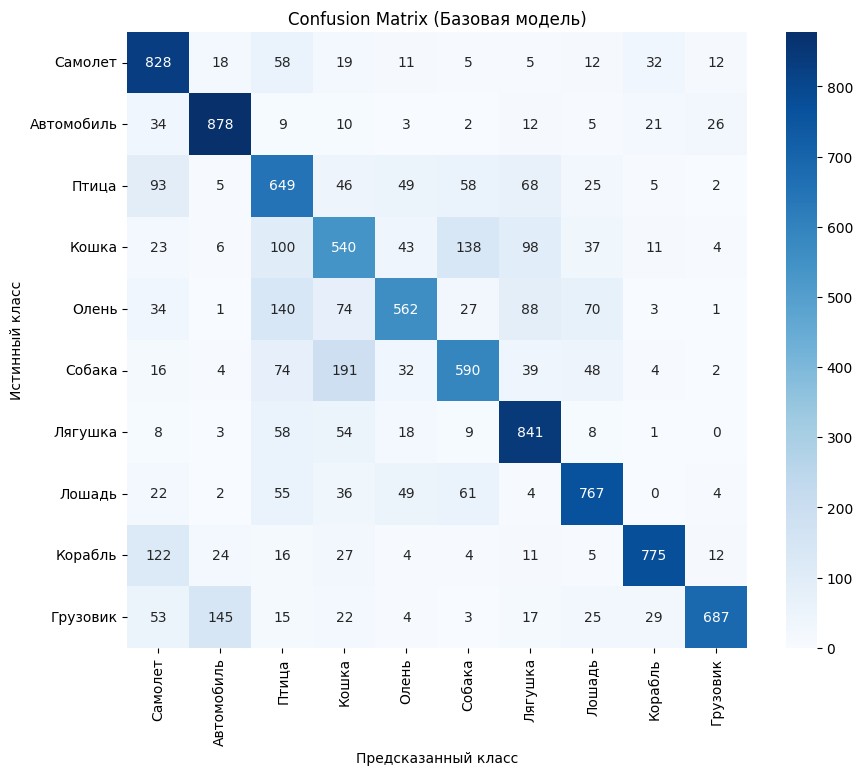

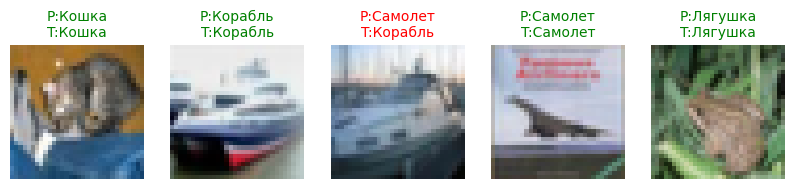

In [ ]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_cat, axis=1)

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Базовая модель)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    pred_label = class_names[predicted_classes[i]]
    true_label = class_names[true_classes[i]]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"P:{pred_label}\nT:{true_label}", color=color, fontsize=10)
    plt.axis('off')
plt.show()


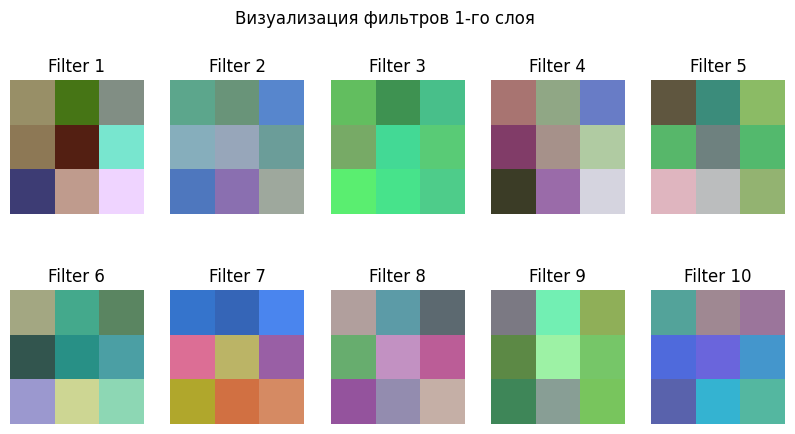

In [ ]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

plt.figure(figsize=(10, 5))
n_filters = 10
for i in range(n_filters):
    f = filters[:, :, :, i]
    plt.subplot(2, 5, i+1)
    plt.imshow(f)
    plt.axis('off')
    plt.title(f'Filter {i+1}')
plt.suptitle('Визуализация фильтров 1-го слоя')
plt.show()

#### Улучшение модели

In [ ]:
def create_improved_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(32, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [ ]:
improved_model = create_improved_model()
improved_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
history_improved = improved_model.fit(train_images, train_labels_cat, epochs=15,
                                      validation_data=(test_images, test_labels_cat),
                                      batch_size=64, verbose=1)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 353s 445ms/step - accuracy: 0.3952 - loss: 1.7300 - val_accuracy: 0.5952 - val_loss: 1.1354
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 372s 433ms/step - accuracy: 0.6085 - loss: 1.0951 - val_accuracy: 0.6251 - val_loss: 1.0471
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 335s 428ms/step - accuracy: 0.6770 - loss: 0.9211 - val_accuracy: 0.7191 - val_loss: 0.8037
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 430ms/step - accuracy: 0.7112 - loss: 0.8191 - val_accuracy: 0.6745 - val_loss: 0.9485
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 335s 429ms/step - accuracy: 0.7329 - loss: 0.7653 - val_accuracy: 0.7491 - val_loss: 0.7049
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 388s 436ms/step - accuracy: 0.7523 - loss: 0.7111 - val_accuracy: 0.7386 - val_loss: 0.7380
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 342s 437ms/step - accuracy: 0.7646 - loss: 0.6747 - val_accuracy: 0.7581 - val_loss: 0.6841
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 337s 431ms/step - accuracy: 0.7701 -

Точность базовой модели: 0.7117
Точность улучшенной модели: 0.7987


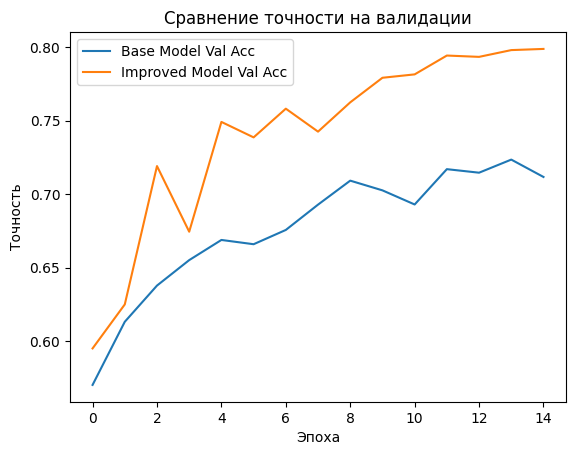

In [ ]:
test_loss_imp, test_acc_imp = improved_model.evaluate(test_images, test_labels_cat, verbose=0)
print(f"Точность базовой модели: {test_acc:.4f}")
print(f"Точность улучшенной модели: {test_acc_imp:.4f}")

plt.plot(history.history['val_accuracy'], label='Base Model Val Acc')
plt.plot(history_improved.history['val_accuracy'], label='Improved Model Val Acc')
plt.title('Сравнение точности на валидации')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()